# Electronic Sales Analysis in Amazon

by: Muhammad Iqbal

**Problem Statement**
- The source code for this project is available on my GitHub ([Here](https://github.com/iqbalstilllearning/sales-analysis-electronis-amazon))
- The dataset utilized originates from Kaggle ([Here](https://www.kaggle.com/datasets/edusanketdk/electronics)) with 1.292.954 rows and 10 columns.
- The dataset in question is sourced from Amazon and pertains to electronic sales, encompassing various aspects such as user information, item details, ratings, timestamps, and additional attributes.
- The primary objective of this project is to conduct a thorough analysis of the electronic sales data on Amazon and extract valuable insights to guide strategic decision-making.
- The specific focus is on addressing key questions and exploring pertinent factors related to sales performance, customer behavior, and product attributes.
- The analysis aims to provide actionable recommendations for optimizing sales, improving customer satisfaction, and enhancing overall business performance.
- To achieve these goals, we will delve into patterns, trends, and correlations within the dataset, seeking to uncover relationships between user behavior, product characteristics, and sales outcomes.

**Research Questions**
1. **Time Series Analysis**
   - How is the annual trend in the sales of electronic products? Is there any specific increase or decrease?
   - Are there seasonal patterns in sales, such as during specific years and months?
   - What is the distribution of product ratings across the dataset over the years and months?

2. **Category and Brand Performances**
   - Which category of electronic products is the most popular on Amazon based on sales or average ratings?
   - Are there specific trends in the categories of products sold in different years?
   - Which electronic product brand is the most popular on Amazon based on sales or average ratings?
   - Are there specific trends in the brands of products sold in different years?

3. **User Segmentation**
   - What is the distribution of consumer gender across the entire dataset?
   - Can you identify and segment users based on model or category preferences?

# Library & Explore data

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('electronics.csv')
df

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.strftime('%b')
df      


,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split,month
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0,Jun
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0,Jun
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0,Jun
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0,Jul
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0,Jul
...,...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0,Sep
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0,Sep
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0,Sep
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0,Sep


In [5]:
df.columns

Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand', 'year', 'user_attr', 'split', 'month'],
      dtype='object')

In [6]:
len(df)

1292954

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   item_id     1292954 non-null  int64         
 1   user_id     1292954 non-null  int64         
 2   rating      1292954 non-null  float64       
 3   timestamp   1292954 non-null  datetime64[ns]
 4   model_attr  1292954 non-null  object        
 5   category    1292954 non-null  object        
 6   brand       331120 non-null   object        
 7   year        1292954 non-null  int64         
 8   user_attr   174124 non-null   object        
 9   split       1292954 non-null  int64         
 10  month       1292954 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 108.5+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
month               0
dtype: int64

In [10]:
df.describe()

,item_id,user_id,rating,timestamp,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06,1292954,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00,2015-06-18 11:30:34.851355904,2.012938e+03,1.747587e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1999-06-13 00:00:00,1.999000e+03,0.000000e+00
25%,2.018000e+03,2.697482e+05,4.000000e+00,2014-09-06 00:00:00,2.012000e+03,0.000000e+00
50%,3.930000e+03,5.518920e+05,5.000000e+00,2015-10-19 00:00:00,2.014000e+03,0.000000e+00
75%,6.289000e+03,8.474858e+05,5.000000e+00,2016-10-19 00:00:00,2.015000e+03,0.000000e+00
max,9.559000e+03,1.157632e+06,5.000000e+00,2018-10-01 00:00:00,2.018000e+03,2.000000e+00
std,2.525346e+03,3.342374e+05,1.379732e+00,NaN,2.643513e+00,5.506810e-01


# 1. TIME SERIES ANALYSIS

- How is the annual trend in the sales of electronic products? Is there any specific increase or decrease?

C:\Users\muham\AppData\Local\Temp\ipykernel_19660\2868880485.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='year', palette='inferno')


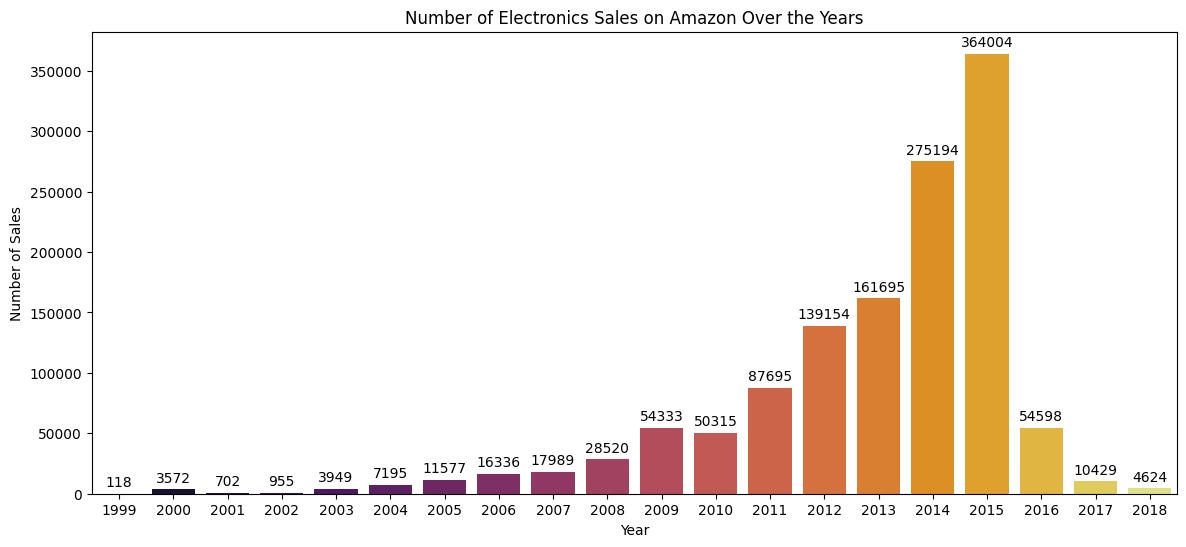

In [32]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=df, x='year', palette='inferno')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, color='black', label_type='edge', padding=3)
plt.title('Number of Electronics Sales on Amazon Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()

Electronics sales on Amazon have experienced significant growth in recent years. In 1999, the number of electronics sales on Amazon was only 118 units. However, in 2015, the number of electronic sales on Amazon reached 364,004 units. Unfortunately, there was a drastic decline the following year.

- Are there seasonal patterns in sales, such as during specific years and months?

C:\Users\muham\AppData\Local\Temp\ipykernel_19660\1171715017.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=month_sales, y='count', x='month', palette='inferno')


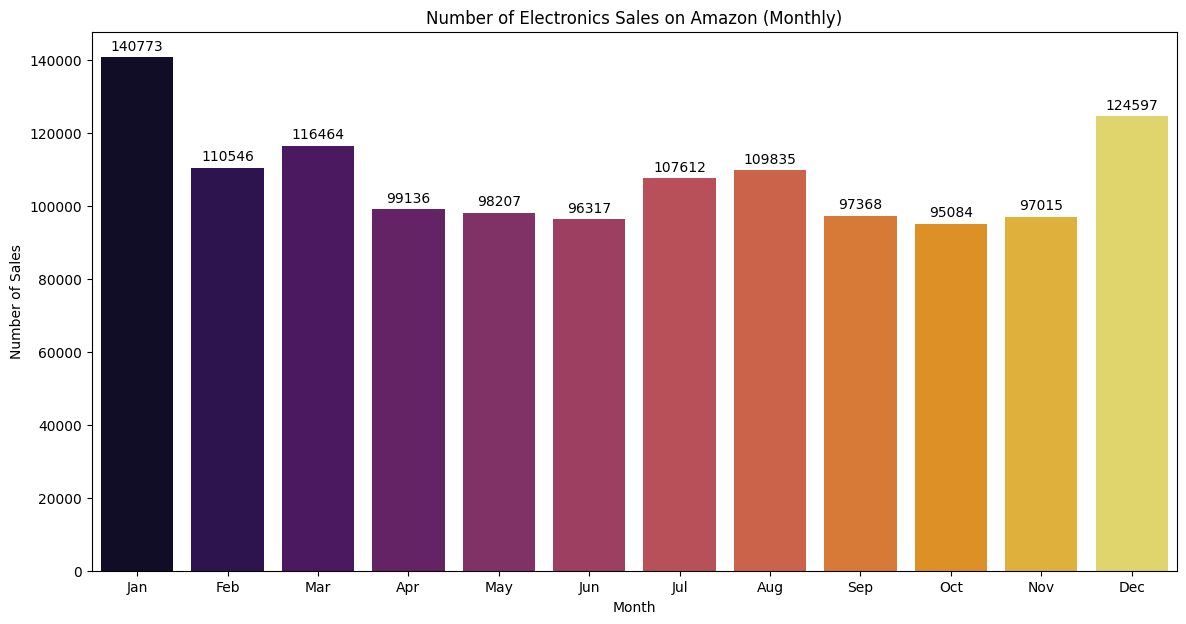

In [12]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df.sort_values('month')

plt.figure(figsize=(14, 7))
month_sales = df['month'].value_counts().reset_index()
ax = sns.barplot(data=month_sales, y='count', x='month', palette='inferno')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, color='black', label_type='edge', padding=3)
plt.title('Number of Electronics Sales on Amazon (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()

The busiest month all the time (1999-2018) for electronics sales was January, with 140.773 items sold. And the slowest month for electronics sales was October, with 95.084 items sold. 

C:\Users\muham\AppData\Local\Temp\ipykernel_19660\1312307199.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_counts = df.groupby(['month', 'year']).size().reset_index(name='review_count')


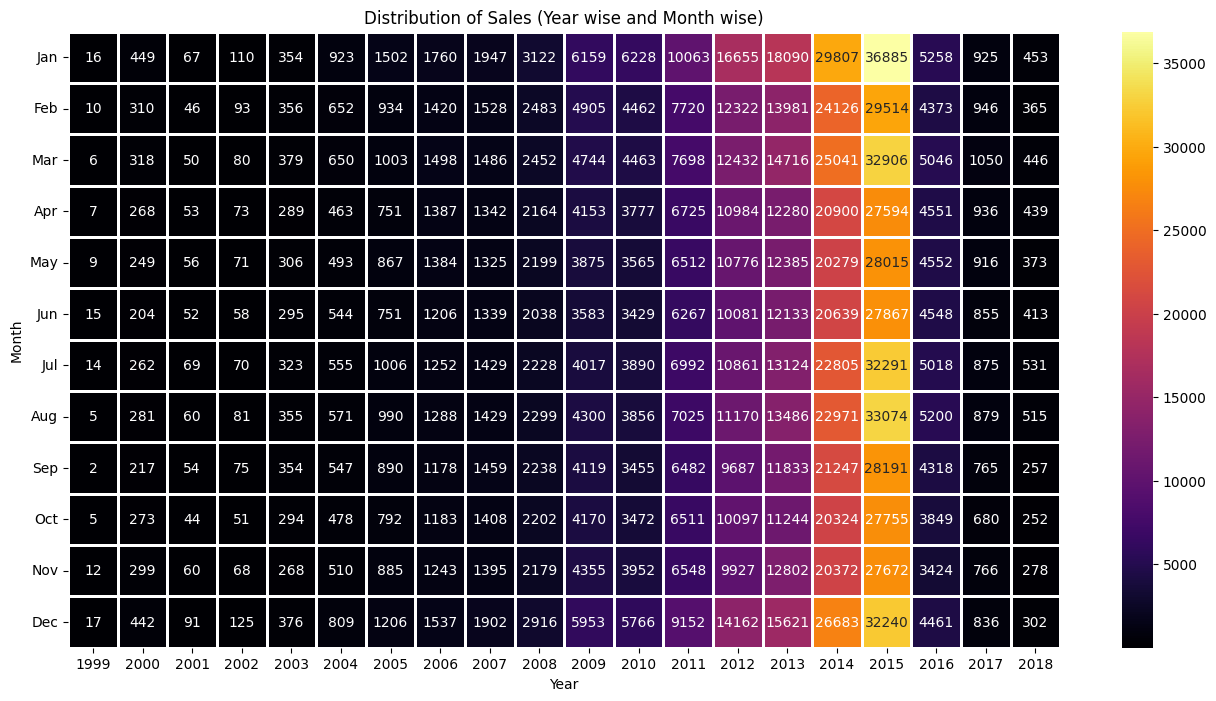

In [13]:
review_counts = df.groupby(['month', 'year']).size().reset_index(name='review_count')

review_counts_pivot = review_counts.pivot(index='month', columns='year', values='review_count').fillna(0)

plt.figure(figsize=(16, 8))
sns.heatmap(review_counts_pivot, cmap='inferno', linewidths=.8, annot=True, fmt='.0f')
plt.title('Distribution of Sales (Year wise and Month wise)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(rotation=0)
plt.show()

There seems to be a general upward trend in sales year-over-year, with each year surpassing the previous year's total sales. The analysis reveals that the period between 2009 and 2015 marked the busiest years, with sales evenly distributed across each month. The pinnacle of sales occurred in January 2015.

- What is the distribution of product ratings across the dataset over the years and months?

C:\Users\muham\AppData\Local\Temp\ipykernel_19660\1056799901.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='rating', palette='inferno')


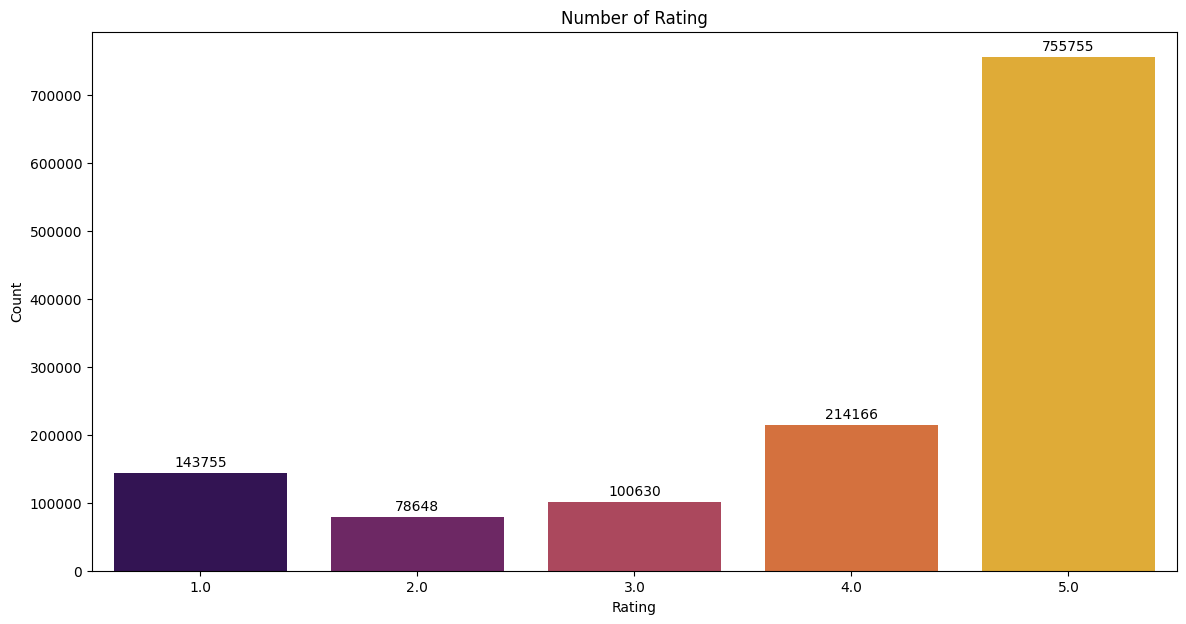

In [14]:
plt.figure(figsize=(14, 7))
ax = sns.countplot(data=df, x='rating', palette='inferno')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, color='black', label_type='edge', padding=3)
plt.title('Number of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

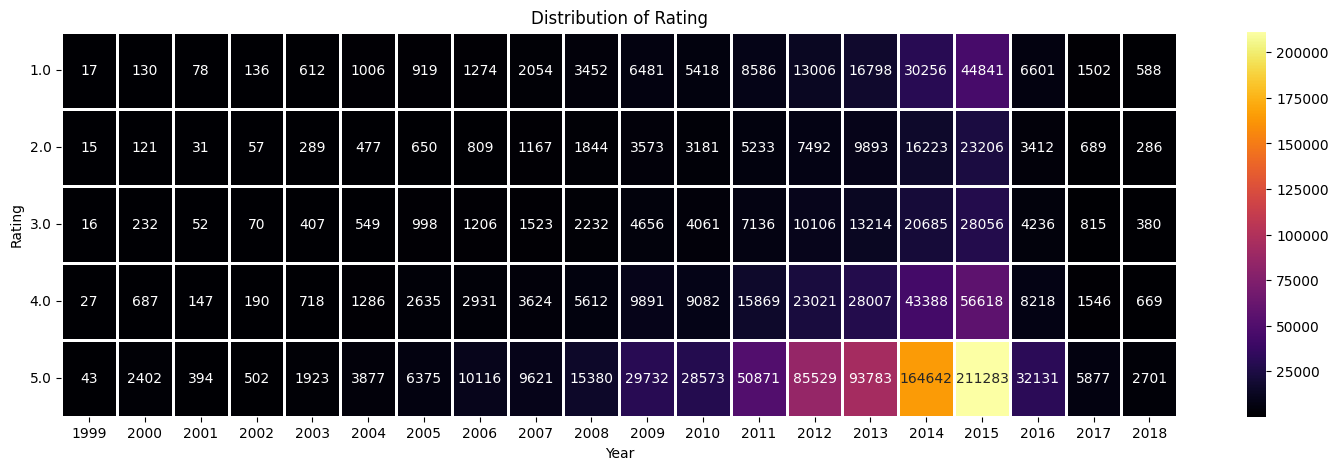

In [15]:
rating_count = df.groupby(['rating', 'year']).size().reset_index(name='review_count')
rating_count_pivot = rating_count.pivot(index='rating', columns='year', values='review_count').fillna(0)
plt.figure(figsize=(18, 5))
sns.heatmap(rating_count_pivot, cmap='inferno', linewidths=.8, annot=True, fmt='.0f')
plt.title('Distribution of Rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.yticks(rotation=0)
plt.show()


C:\Users\muham\AppData\Local\Temp\ipykernel_19660\947417256.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_count = df.groupby(['rating', 'month']).size().reset_index(name='rating_count')


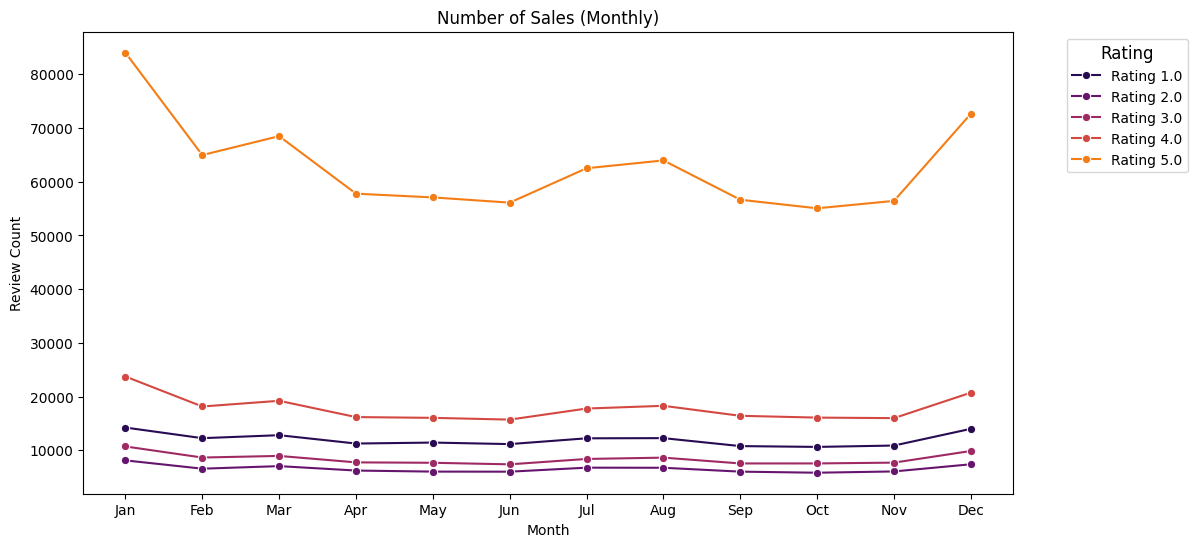

In [35]:
rating_count = df.groupby(['rating', 'month']).size().reset_index(name='rating_count')
rating_count_pivot = rating_count.pivot(index='month', columns='rating', values='rating_count').fillna(0)

plt.figure(figsize=(12, 6))
sns.set_palette("inferno")

# Plot line for each rating
for rating in sorted(rating_count_pivot.columns):  # Use column names directly
    sns.lineplot(data=rating_count_pivot, x='month', y=rating, label=f'Rating {rating}', marker='o')

plt.title('Number of Sales (Monthly)')
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.legend(title='Rating', title_fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


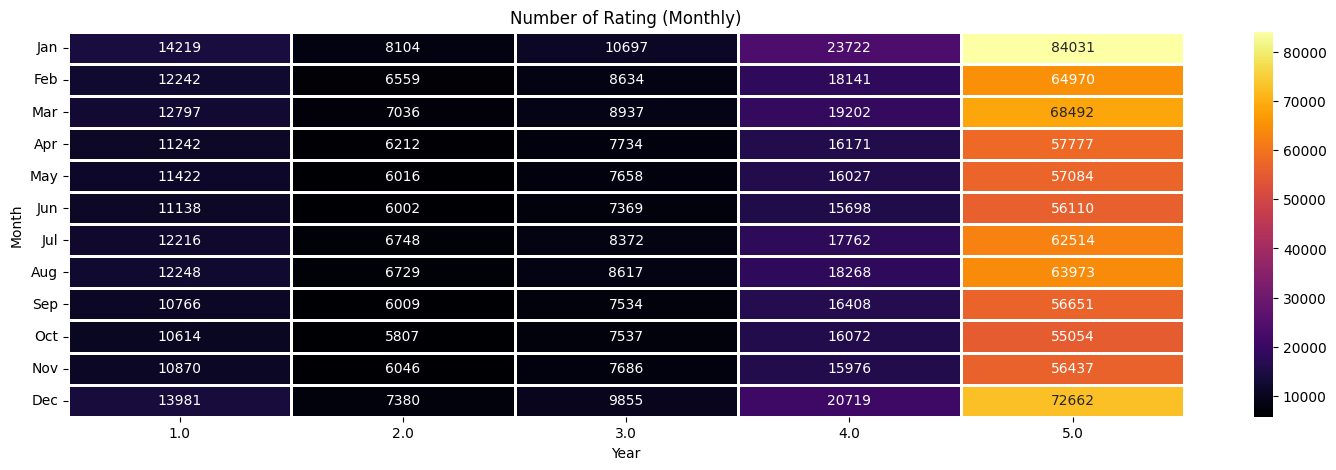

In [37]:
plt.figure(figsize=(18, 5))
sns.heatmap(rating_count_pivot, cmap='inferno', linewidths=.8, annot=True, fmt='.0f')
plt.title('Number of Rating (Monthly)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(rotation=0)
plt.show()

The distribution of ratings reveals that consumers predominantly assigned a rating of 5, totaling 755.755, surpassing other ratings. Notably, across the annual spectrum, all ratings peaked in 2015. Similarly, on a monthly basis, January witnessed the highest frequency of ratings.

# 2. Category and Brand Performance

   - Which category of electronic products is the most popular on Amazon based on sales or average ratings?

C:\Users\muham\AppData\Local\Temp\ipykernel_19660\1246658242.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='category', order=category_counts, palette='inferno')


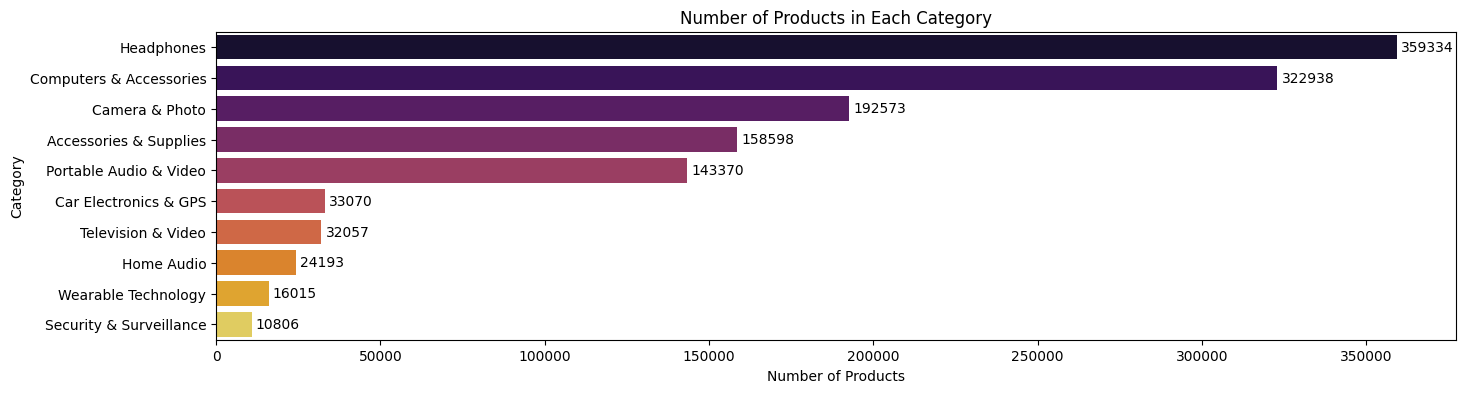

In [46]:
category_counts = df['category'].value_counts().index

plt.figure(figsize=(16, 4))
ax = sns.countplot(data=df, y='category', order=category_counts, palette='inferno')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, color='black', label_type='edge', padding=3)
plt.title('Number of Products in Each Category')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_19660\2708339753.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='category', x='rating', data=average_rating_by_category, palette='inferno')


Text(0.5, 0, 'Average Rating')

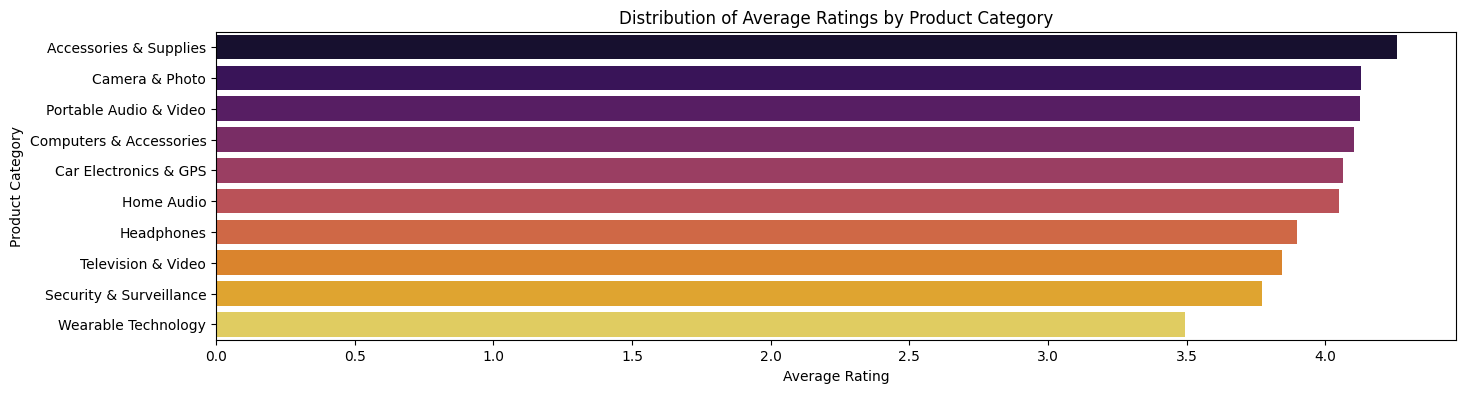

In [45]:
average_rating_by_category = df.groupby('category')['rating'].mean().reset_index()
average_rating_by_category = average_rating_by_category.sort_values('rating', ascending=False)
average_rating_by_category

plt.figure(figsize=(16, 4))
sns.barplot(y='category', x='rating', data=average_rating_by_category, palette='inferno')
plt.title('Distribution of Average Ratings by Product Category')
plt.ylabel('Product Category')
plt.xlabel('Average Rating')


In terms of sales, the headphones category emerges as the most popular, boasting a total of 359,334 units sold. Conversely, the security & surveillance category lags behind as the least popular, with a total of 10,806 units sold. Shifting focus to average ratings, accessories & supplies claim the top spot, while wearable technology takes the bottom position in terms of consumer satisfaction.

   - Are there specific trends in the categories of products sold in different years?

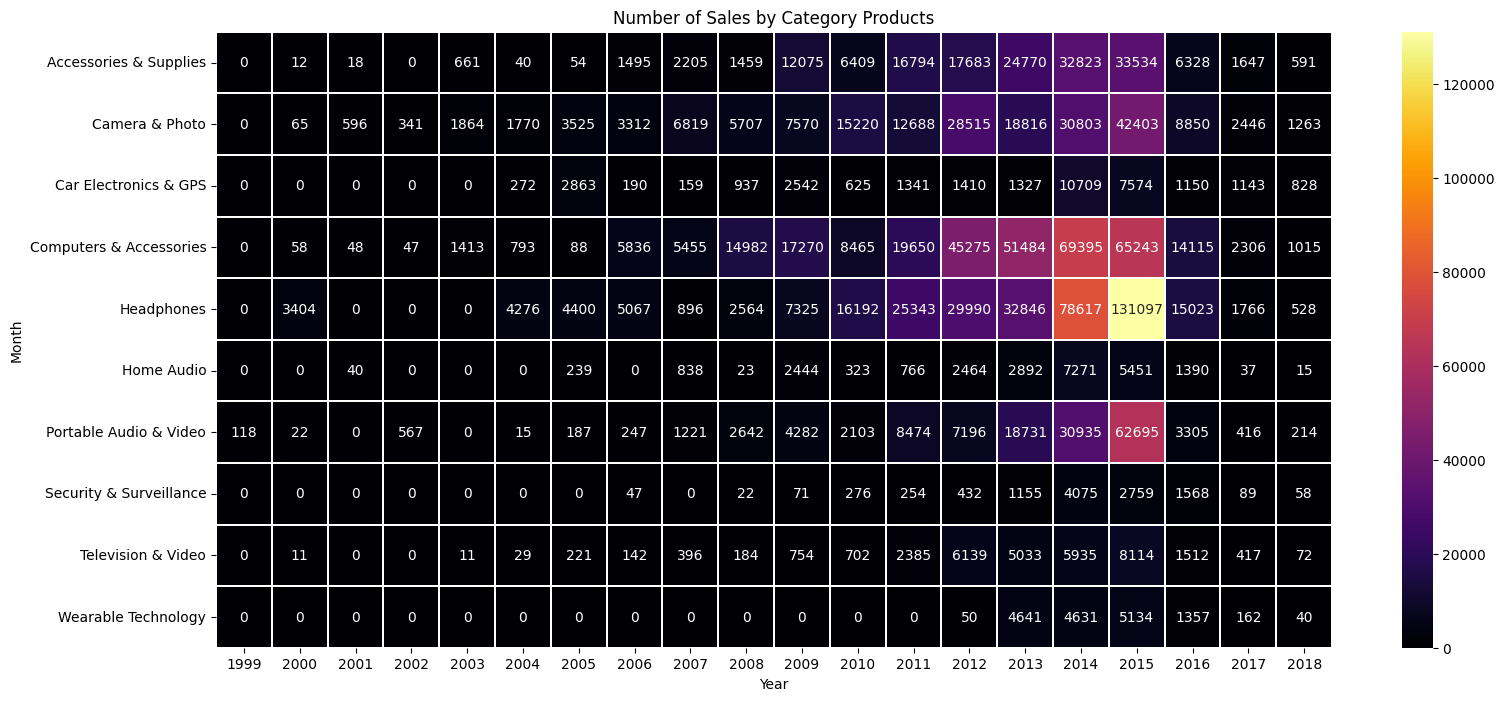

In [48]:
category_trend = df.groupby(['category', 'year']).size().reset_index(name='count')

category_trend_pivot = category_trend.pivot(index='category', columns='year', values='count').fillna(0)

plt.figure(figsize=(18, 8))
sns.heatmap(category_trend_pivot, cmap='inferno', linewidths=.1, annot=True, fmt='.0f')
plt.title('Number of Sales by Category Products')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(rotation=0)
plt.show()

Products in the headphones category were the most sold, especially in 2014 and 2015. Products in the computers & accessories category also saw an increase in sales from 2012 to 2015.

   - Which electronic product brand is the most popular on Amazon based on sales or average ratings?


C:\Users\muham\AppData\Local\Temp\ipykernel_19660\3552274038.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='brand', order=brand_counts, palette='inferno')


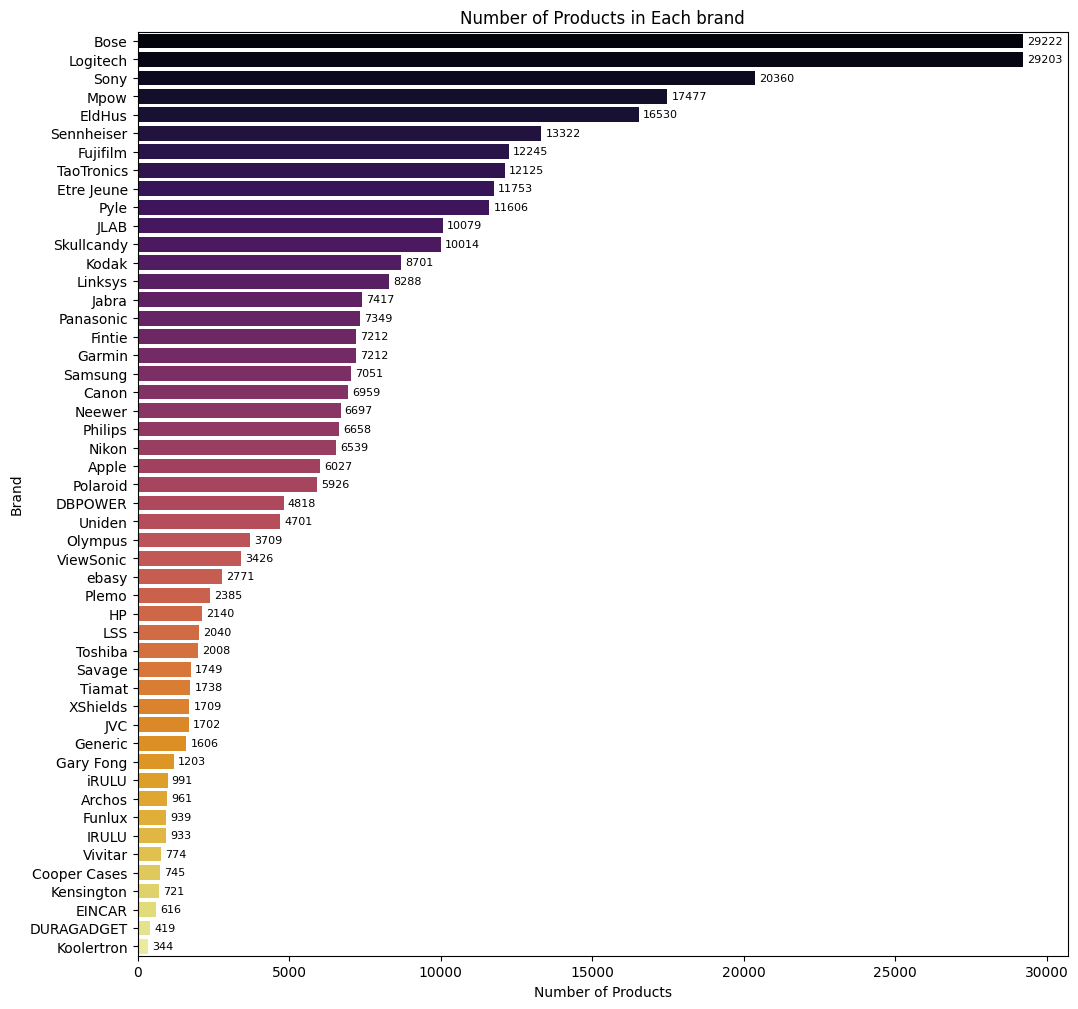

In [52]:
brand_counts = df['brand'].value_counts().index

plt.figure(figsize=(12, 12))
ax = sns.countplot(data=df, y='brand', order=brand_counts, palette='inferno')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=8, color='black', label_type='edge', padding=3)
plt.title('Number of Products in Each brand')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.show()


C:\Users\muham\AppData\Local\Temp\ipykernel_19660\3172589131.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='brand', x='rating', data=average_rating_by_brand, palette='inferno')


Text(0.5, 0, 'Average Rating')

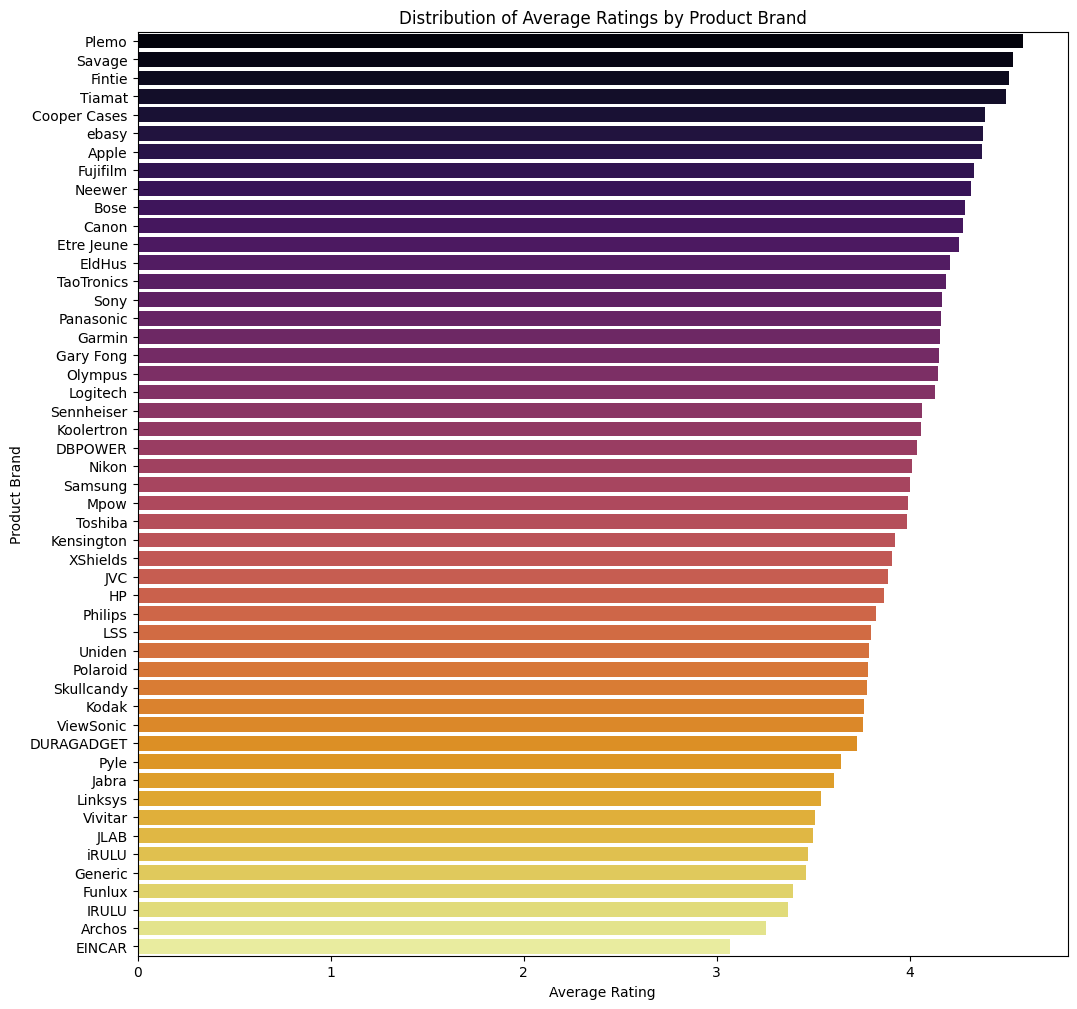

In [53]:
average_rating_by_brand = df.groupby('brand')['rating'].mean().reset_index()
average_rating_by_brand = average_rating_by_brand.sort_values('rating', ascending=False)
average_rating_by_brand

plt.figure(figsize=(12, 12))
sns.barplot(y='brand', x='rating', data=average_rating_by_brand, palette='inferno')
plt.title('Distribution of Average Ratings by Product Brand')
plt.ylabel('Product Brand')
plt.xlabel('Average Rating')

In terms of sales, bose and logitech emerges as the most popular, boasting a total of 29.2k units sold. Conversely, koolertron lags behind as the least popular, with a total of 344 units sold. Shifting focus to average ratings, plemo claim the top spot, while EINCAR takes the bottom position in terms of consumer satisfaction.

   - Are there specific trends in the brands of products sold in different years?

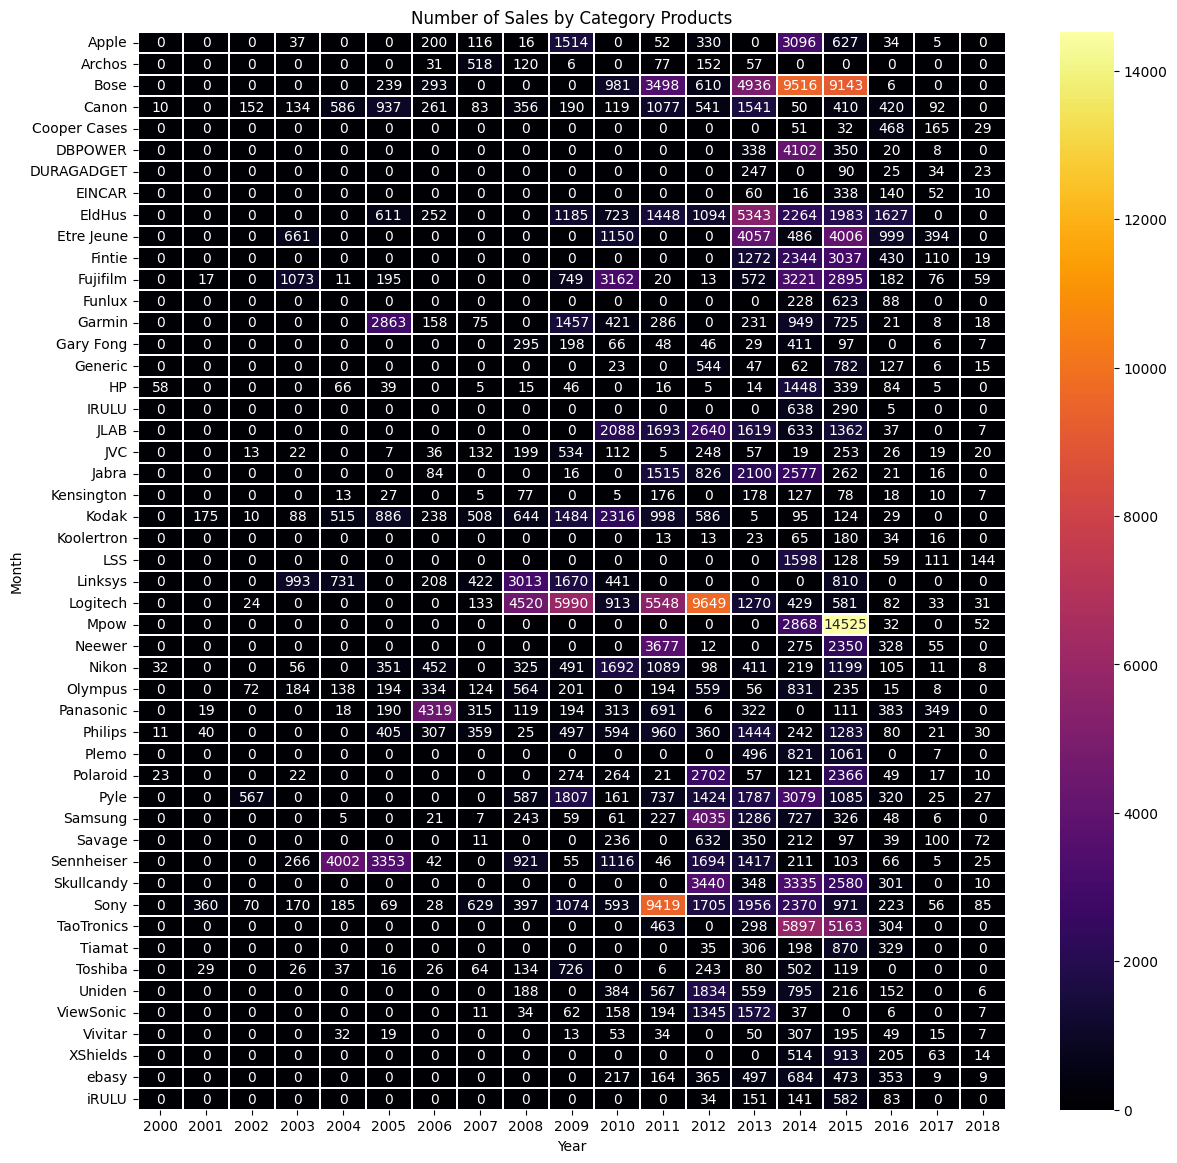

In [55]:
brand_trend = df.groupby(['brand', 'year']).size().reset_index(name='count')

brand_trend_pivot = brand_trend.pivot(index='brand', columns='year', values='count').fillna(0)

plt.figure(figsize=(14, 14))
sns.heatmap(brand_trend_pivot, cmap='inferno', linewidths=.1, annot=True, fmt='.0f')
plt.title('Number of Sales by Category Products')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(rotation=0)
plt.show()

In 2014 and 2015, the sales trend for the Mpow and Bose brands increased drastically from previous years. In 2011, Sony became the best-selling brand and in 2012 it was taken over by Logitech.

# 3. User Segmentation

- What is the distribution of consumer gender across the entire dataset?

Text(0.5, 1.0, 'Distribution of Consument Gender')

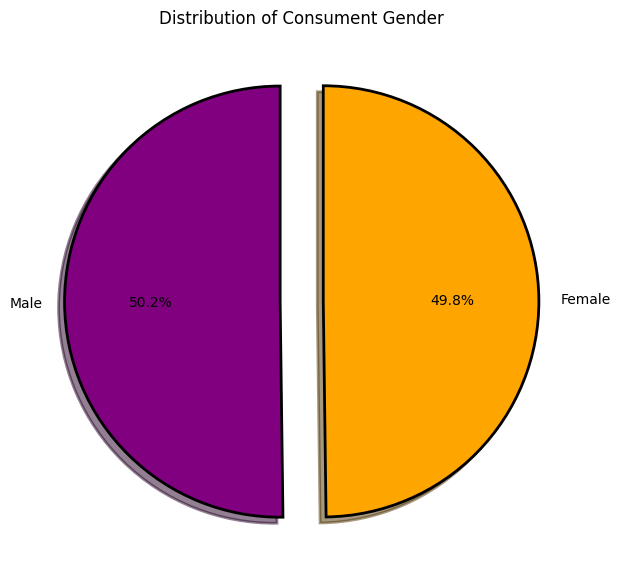

In [24]:
fig = plt.figure(figsize=(7,7))
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df['user_attr'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=['purple', 'orange'],
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of Consument Gender')

 - Can you identify and segment users based on model or category preferences?

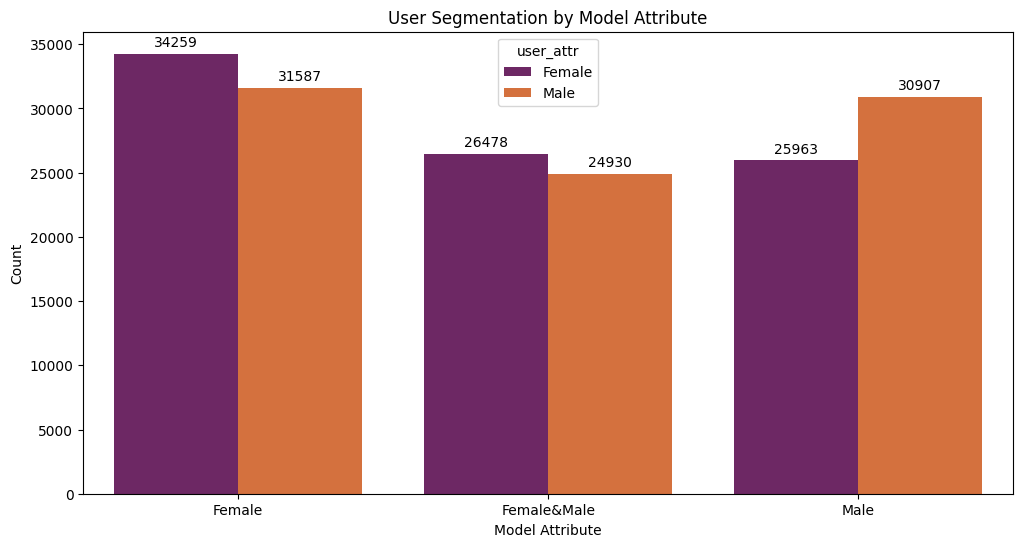

In [57]:
segmentation = df.groupby('model_attr')['user_attr'].value_counts().reset_index(name='count')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='model_attr', y='count', hue='user_attr', data=segmentation, palette='inferno')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, color='black', label_type='edge', padding=3)
plt.title('User Segmentation by Model Attribute')
plt.xlabel('Model Attribute')
plt.ylabel('Count')
plt.show()

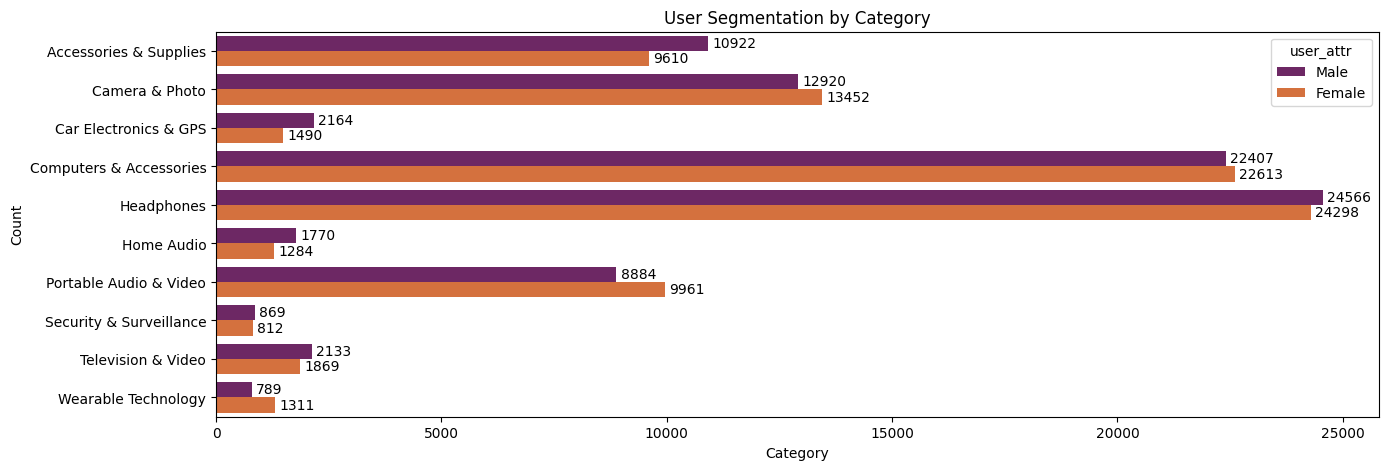

In [56]:
segmentation = df.groupby('category')['user_attr'].value_counts().reset_index(name='count')

plt.figure(figsize=(15, 5))
ax = sns.barplot(y='category', x='count', hue='user_attr', data=segmentation, palette='inferno')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, color='black', label_type='edge', padding=3)
plt.title('User Segmentation by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

The consumer gender distribution is nearly equal, with males accounting for 50.2% and females for 49.8%. Based on the model, the highest sales are attributed to the female model. Meanwhile, in terms of categories, headphones have the highest sales.